In [ ]:
# transformação de dados
#numericos e Texto

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dados = pd.read_csv("breast-cancer.csv")

In [ ]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,110.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## calculo para detecção de outlier

In [ ]:
# calcular a mediana da amostra
mediana = dados.radius_mean.median()

In [ ]:
# mediana inferio. || valores abaixo da mediana
medianaInferior = dados.radius_mean[dados.radius_mean < mediana].dropna().median()

In [ ]:
#mediana superior || valores acima da mediana
medianaSuperior = dados.radius_mean[dados.radius_mean > mediana].dropna().median()

In [ ]:
print(mediana, medianaInferior, medianaSuperior)

13.38 11.705 16.05


In [ ]:
barreira_inferior = medianaInferior - 1.5*(medianaSuperior-medianaInferior)

In [ ]:
barreira_superior = medianaSuperior + 1.5*(medianaSuperior-medianaInferior)

In [ ]:
print(barreira_inferior, barreira_superior)

5.187499999999999 22.567500000000003


In [ ]:
#abaixo do limite inferior
dados.radius_mean < barreira_inferior

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Name: radius_mean, Length: 569, dtype: bool

In [ ]:
# acima do imite superior
dados.radius_mean > barreira_superior

0      False
1      False
2      False
3       True
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Name: radius_mean, Length: 569, dtype: bool

In [ ]:
dados.radius_mean[dados.radius_mean < barreira_inferior]

Series([], Name: radius_mean, dtype: float64)

In [ ]:
dados.radius_mean[dados.radius_mean > barreira_superior]

3      110.42
7      130.71
15     140.54
30     180.63
82      25.22
122     24.25
164     23.27
180     27.22
202     23.29
212     28.11
236     23.21
339     23.51
352     25.73
461     27.42
503     23.09
521     24.63
Name: radius_mean, dtype: float64

In [ ]:
# exclusão dos outliers
dados_limpos = dados.radius_mean[(dados.radius_mean > barreira_inferior)
                                & (dados.radius_mean < barreira_superior)]

In [ ]:
print(dados.shape, dados_limpos.shape)

(569, 32) (553,)


In [ ]:
# intervalo interquartil para identificar
# media

In [ ]:
# meio da amostra
mediana = dados.radius_mean.median()

In [ ]:
# divisão entre primeiro quartil e o segundo
medianaInferior = dados.radius_mean.quantile(0.25)

In [ ]:
# divisão entre o terceiro quartil e quarto quartil
medianaSuperior = dados.radius_mean.quantile(0.75)

In [ ]:
print(mediana, medianaInferior, medianaSuperior)

13.38 11.71 16.03


In [ ]:
# tipos de transformações
# colocar em raiz cubica, raizquadrada, log base diferente de 10
#
dados_r3 = np.cbrt(dados.radius_mean)


In [ ]:

me = dados_r3.median()

In [ ]:
mI = dados_r3.quantile(0.25)

In [ ]:
mS = dados_r3.quantile(0.75)

In [ ]:
barreira_inferior = mI - 1.5*(mS-mI)

In [ ]:
barreira_superior = mS + 1.5*(mS-mI)

In [ ]:
dados_r3[dados_r3 < barreira_inferior]

Series([], Name: radius_mean, dtype: float64)

In [ ]:
dados_r3[dados_r3 > barreira_superior]

3      4.797510
7      5.075003
15     5.199162
30     5.652796
82     2.932570
180    3.008126
212    3.040560
352    2.952206
461    3.015476
521    2.909521
Name: radius_mean, dtype: float64

In [ ]:
# normalização dos dados
# é muito comum para poder colocar
#os dados em algoritmos de aprendizado de maquina
#normalização max-min

In [ ]:
maior = dados.radius_mean.max()

In [ ]:
menor = dados.radius_mean.min()

In [ ]:
novo_max = 1

In [ ]:
novo_menor = 0

In [ ]:
novoValor = ((dados.radius_mean - menor)/(maior - menor)) * (novo_max -
novo_menor) + novo_menor

In [ ]:
novoValor

0      0.063398
1      0.078256
2      0.073188
3      0.595679
4      0.076643
         ...   
564    0.083957
565    0.075722
566    0.055393
567    0.078428
568    0.004486
Name: radius_mean, Length: 569, dtype: float64

In [ ]:
# formula matematica de normalização
# pode ser aplicada em qualquer intervalode de valores numericos
def normalizaMinMax(intervalo, novo_min, novo_max):
  menor = intervalo.min()
  maior = intervalo.max()
  novoValor = ((intervalo - menor)/(maior - menor)) * (novo_max -novo_min) + novo_min
  return novoValor


In [ ]:
normalizaMinMax(dados.area_mean, -1, 1)

0     -0.272534
1      0.003181
2     -0.101166
3     -0.794189
4     -0.021421
         ...   
564    0.132980
565   -0.051962
566   -0.393765
567   -0.048568
568   -0.968187
Name: area_mean, Length: 569, dtype: float64

In [ ]:
### exericicio
## aplicar a função normalizaMinMax nem todos  campos numericos do
#data Frame dados


In [ ]:
dados.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# cortamos as duas primeiras colunas
# id e o outro é um campo texto
novo_dados = dados.iloc[:,2:]

In [ ]:
novo_dados

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,110.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# seleciona todos os campos numericos int, float ....
Ndados = dados.select_dtypes(include='number')

In [ ]:
#aplicar a função nas colunas

In [ ]:
colunas = Ndados.columns

In [ ]:
colunas = list(colunas)

In [ ]:
for col in colunas:
  k = normalizaMinMax(Ndados.loc[:, col],0,1)
  Ndados[col] = k

In [ ]:
Ndados.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.063398,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.078256,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.073188,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.595679,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.076643,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
### dados categoricos e textuais
# dos dados de entrada devem ser numeros
# e  o que aconteve quando eu tenho texto tbm?

In [ ]:
# dados categoricos
# dados em texto que se repetem e podem ser alterados ou ter um indice numerico associado a ele


In [ ]:
arquivo = "/content/resultado.csv"

In [ ]:
dfResult = pd.read_csv(arquivo)

In [ ]:
dfResult.dtypes

OrderDate     object
Region        object
Rep           object
Item          object
Units          int64
UnitCost     float64
Total        float64
dtype: object

In [ ]:
# que é um dado object
# tem valoers que se repetem
dfResult.Region.value_counts()

Central    24
East       13
West        6
Name: Region, dtype: int64

In [ ]:
# sobrescrever o valor que se repete por indices numericos
df1 = dfResult.copy()

In [ ]:
substituicao = {"Region":{"Central":1,"East":2,"West":3}}

In [ ]:
df1 = df1.replace(substituicao)

In [ ]:
df1.head()

,OrderDate,Region,Rep,Item,Units,UnitCost,Total
0,1/6/2020,2,Jones,Pencil,95,1.99,189.05
1,1/23/2020,1,Kivell,Binder,50,19.99,999.50
2,2/9/2020,1,Jardine,Pencil,36,4.99,179.64
3,2/26/2020,1,Gill,Pen,27,19.99,539.73
4,3/15/2020,3,Sorvino,Pencil,56,2.99,167.44


In [ ]:
# atribuir um rotulo numerico e tranformr isso em, dado
#category


In [ ]:
df2 = dfResult.copy()

In [ ]:
df2.Region = df2.Region.astype('category')

In [ ]:
df2.dtypes

OrderDate      object
Region       category
Rep            object
Item           object
Units           int64
UnitCost      float64
Total         float64
dtype: object

In [ ]:
df2.Region.cat.codes.head()

0    1
1    0
2    0
3    0
4    2
dtype: int8

In [ ]:
df2.Region.head()

0       East
1    Central
2    Central
3    Central
4       West
Name: Region, dtype: category
Categories (3, object): ['Central', 'East', 'West']

In [ ]:
# estatisca
# cria variaveis dumies
dumies = pd.get_dummies(df2.Region)

In [ ]:
# criar um com as variaveis dumies de Region
dfDumie = pd.get_dummies(df2, columns = ["Region"])

In [ ]:
dfDumie.head()

,OrderDate,Rep,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West
0,1/6/2020,Jones,Pencil,95,1.99,189.05,0,1,0
1,1/23/2020,Kivell,Binder,50,19.99,999.50,1,0,0
2,2/9/2020,Jardine,Pencil,36,4.99,179.64,1,0,0
3,2/26/2020,Gill,Pen,27,19.99,539.73,1,0,0
4,3/15/2020,Sorvino,Pencil,56,2.99,167.44,0,0,1


In [ ]:
dfDumies = pd.get_dummies(df2, columns = ["Region", "Item", "Rep"])

In [ ]:
dfDumies.head()


,OrderDate,Units,UnitCost,Total,Region_Central,Region_East,Region_West,Item_Binder,Item_Desk,Item_Pen,...,Rep_Gill,Rep_Howard,Rep_Jardine,Rep_Jones,Rep_Kivell,Rep_Morgan,Rep_Parent,Rep_Smith,Rep_Sorvino,Rep_Thompson
0,1/6/2020,95,1.99,189.05,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1/23/2020,50,19.99,999.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2/9/2020,36,4.99,179.64,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2/26/2020,27,19.99,539.73,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,3/15/2020,56,2.99,167.44,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# trabalhar com textos
# os dados não estão estrurados
# ou queremos extrair algum conhecimento desse texto
# pré-processamento do texto

In [ ]:
arquivo = "/content/movies.json"
filmes = pd.read_json(arquivo)

In [ ]:
filmes.tail()

,title,year,cast,genres
28790,Bumblebee,2018,"[Hailee Steinfeld, John Cena, Jorge Lendeborg ...","[Action, Adventure, Science Fiction]"
28791,Welcome to Marwen,2018,"[Steve Carell, Leslie Mann, Diane Kruger, Falk...","[Fantasy, Drama]"
28792,Holmes and Watson,2018,"[Will Ferrell, John C. Reilly, Rebecca Hall, R...","[Action, Mystery, Comedy]"
28793,On the Basis of Sex,2018,"[Felicity Jones, Armie Hammer, Justin Theroux,...","[Biography, Drama]"
28794,Destroyer,2018,"[Nicole Kidman, Tatiana Maslany, Sebastian Sta...","[Crime, Thriller]"


In [ ]:
### 1 qual é o numero de filmes por genero
# um filme pode ter mais de um genero
# top 10 de quais generos tem mais

In [ ]:
genero = filmes.genres[1]

In [ ]:
type(genero)

list

In [ ]:
filmes.dtypes

title     object
year       int64
cast      object
genres    object
dtype: object

In [ ]:
# criar uma nova lista
generos = []

In [ ]:
for g in filmes.genres:
  # função para incluir mais de um elemento da lista
  generos.extend(g)

In [ ]:
generos

['Short',
 'Documentary',
 'Comedy',
 'Comedy',
 'Short',
 'Short',
 'Short',
 'Short',
 'Documentary',
 'Short',
 'Comedy',
 'Short',
 'Comedy',
 'Short',
 'Documentary',
 'Western',
 'Documentary',
 'Documentary',
 'Comedy',
 'Comedy',
 'Comedy',
 'Comedy',
 'Adventure',
 'Romance',
 'Short',
 'Crime',
 'Drama',
 'Short',
 'Short',
 'Action',
 'Crime',
 'Western',
 'Short',
 'Animated',
 'Animated',
 'Short',
 'Short',
 'Short',
 'Historical',
 'Biography',
 'Comedy',
 'Comedy',
 'Short',
 'Comedy',
 'Short',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Comedy',
 'Adventure',
 'Drama',
 'Comedy',
 'Horror',
 'Fantasy',
 'Western',
 'Crime',
 'Western',
 'Action',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Short',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Short',
 'Fantasy',
 'Western',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Short',
 'Comedy',
 'Western',
 'Drama',
 'Silent

In [ ]:
### para poder contar as palavras
from collections import Counter

In [ ]:
# passar a lista com os termos
contador = Counter(generos)

In [ ]:
# quais palavras tem na lista
contador.keys()

dict_keys(['Short', 'Documentary', 'Comedy', 'Western', 'Adventure', 'Romance', 'Crime', 'Drama', 'Action', 'Animated', 'Historical', 'Biography', 'Horror', 'Fantasy', 'Silent', 'Sports', 'Thriller', 'War', 'Mystery', 'Erotic', 'Spy', 'Family', 'Science Fiction', 'Musical', 'Sport', 'Noir', 'Suspense', 'Live Action', 'Disaster', 'Teen', 'Political', 'Satire', 'Slasher', 'Martial Arts', 'Performance', 'Superhero', 'Independent', 'Dance', 'Supernatural', 'Legal', 'Found Footage'])

In [ ]:
### os generos mais comuns
contador.most_common(20)

[('Drama', 8744),
 ('Comedy', 7363),
 ('Western', 3013),
 ('Crime', 1499),
 ('Horror', 1166),
 ('Musical', 1166),
 ('Romance', 1147),
 ('Action', 1109),
 ('Adventure', 999),
 ('Thriller', 865),
 ('Science Fiction', 780),
 ('Animated', 757),
 ('Mystery', 629),
 ('War', 556),
 ('Documentary', 529),
 ('Biography', 439),
 ('Noir', 403),
 ('Family', 381),
 ('Short', 355),
 ('Fantasy', 327)]

In [ ]:
####### mais e quando o texto não esta como lista
## uma string em lista split
### eu tenho caracteres especiais [],
## re - expressão em string (texto)
x = "['comedy','dramas']"

In [ ]:
type(x)

str

In [ ]:
# remover os caracteres especiais e colcoar espaço em branco no lugar
x = re.sub('\W'," ",x).strip()

In [ ]:
lista = x.split()

In [ ]:
### trabalhar com todos os generos como string
generos2 = []

In [ ]:
for g in filmes.genres:
  g = re.sub('\W'," ", str(g))
  # tokenization = tokenização
  # separar as palavras de um texto em termos
  # cada termo é um elemento da lista
  generos2.extend(g.split())

In [ ]:
c = Counter(generos2)
c.keys()
c.most_common(20)

[('Drama', 8744),
 ('Comedy', 7363),
 ('Western', 3013),
 ('Crime', 1499),
 ('Horror', 1166),
 ('Musical', 1166),
 ('Romance', 1147),
 ('Action', 1118),
 ('Adventure', 999),
 ('Thriller', 865),
 ('Science', 780),
 ('Fiction', 780),
 ('Animated', 757),
 ('Mystery', 629),
 ('War', 556),
 ('Documentary', 529),
 ('Biography', 439),
 ('Noir', 403),
 ('Family', 381),
 ('Short', 355)]

In [ ]:
### Numero de filmes por cast

In [ ]:
cast = filmes.cast[len(filmes)-1]

In [ ]:
type(cast)

list

In [ ]:
# trabalhar com os dados em lista
elenco = []
for cast in filmes.cast:
  if cast:
    elenco.extend(cast)

In [ ]:
c = Counter(elenco)
c.keys()
c.most_common(20)
# só preciso remover esse and


[('Harold Lloyd', 190),
 ('Hoot Gibson', 142),
 ('John Wayne', 136),
 ('Charles Starrett', 116),
 ('Bebe Daniels', 103),
 ('Johnny Mack Brown', 101),
 ('The Three Stooges', 100),
 ('and', 93),
 ('Wallace Beery', 91),
 ('Buck Jones', 91),
 ('Mary Astor', 91),
 ('Mickey Rooney', 90),
 ('Jack Holt', 88),
 ('Warner Baxter', 86),
 ('Loretta Young', 85),
 ('Tom and Jerry', 85),
 ('William Boyd', 84),
 ('Randolph Scott', 84),
 ('Lionel Barrymore', 83),
 ('Edmund Lowe', 82)]

In [ ]:
while "and" in elenco:
  elenco.remove("and")

In [ ]:
c = Counter(elenco)
c.keys()
c.most_common(20)
# só preciso remover esse and

[('Harold Lloyd', 190),
 ('Hoot Gibson', 142),
 ('John Wayne', 136),
 ('Charles Starrett', 116),
 ('Bebe Daniels', 103),
 ('Johnny Mack Brown', 101),
 ('The Three Stooges', 100),
 ('Wallace Beery', 91),
 ('Buck Jones', 91),
 ('Mary Astor', 91),
 ('Mickey Rooney', 90),
 ('Jack Holt', 88),
 ('Warner Baxter', 86),
 ('Loretta Young', 85),
 ('Tom and Jerry', 85),
 ('William Boyd', 84),
 ('Randolph Scott', 84),
 ('Lionel Barrymore', 83),
 ('Edmund Lowe', 82),
 ('Myrna Loy', 82)]

In [ ]:
#### como String
elenco2 = []

In [ ]:
for cast in filmes.cast:
  # não pode remover os caracteres especiais
  cast = str(cast)
  cast = cast[1:-1] # removi os cochetes
  # valores ausentes
  if cast:
    elenco2.extend(cast.split(","))

In [ ]:
# remover as aspas simples '
elenco2 = [cast.replace("'", "").strip() for cast in  elenco2]

In [ ]:
# remover o and
type(elenco2)

while "and" in elenco2:
  elenco2.remove("and")

In [ ]:
# remover esse .jr
while "Jr." in elenco2:
  elenco2.remove('Jr.')

In [ ]:
## contar os termos
c = Counter(elenco2)
c.keys()
c.most_common(10)

[('Harold Lloyd', 190),
 ('Hoot Gibson', 142),
 ('John Wayne', 136),
 ('Charles Starrett', 116),
 ('Bebe Daniels', 103),
 ('Johnny Mack Brown', 101),
 ('The Three Stooges', 100),
 ('Wallace Beery', 91),
 ('Buck Jones', 91),
 ('Mary Astor', 91)]

In [ ]:
# remover stopwords ( conectores : e, um, uma)
import nltk


In [ ]:
# faço do ambiente do colab do dicionario
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#lista de palavras proibidas
listaProibida = nltk.corpus.stopwords.words('english')

In [ ]:
listaProibida

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# função para poder pegar e tokenizar
from nltk.tokenize import RegexpTokenizer

In [ ]:
# limpar os caracteres especias
tokenizacao = RegexpTokenizer("[\w']+")

In [ ]:
# exemplo de remover especiais
# e como saida é uma lista de termos
# tokenização
#tokenizacao.tokenize(titulo)

In [ ]:
titulos = filmes.title.apply(lambda x: tokenizacao.tokenize(x))

In [ ]:
titulos

0                  [After, Dark, in, Central, Park]
1        [Boarding, School, Girls', Pajama, Parade]
2              [Buffalo, Bill's, Wild, West, Parad]
3                                          [Caught]
4                          [Clowns, Spinning, Hats]
                            ...                    
28790                                   [Bumblebee]
28791                         [Welcome, to, Marwen]
28792                         [Holmes, and, Watson]
28793                     [On, the, Basis, of, Sex]
28794                                   [Destroyer]
Name: title, Length: 28795, dtype: object

In [ ]:
# remover as palavras proibidas
# padronização dos termos em minisculo
titulos = filmes.title.apply(lambda x: tokenizacao.tokenize(x.lower()))

In [ ]:
titulos

0                  [after, dark, in, central, park]
1        [boarding, school, girls', pajama, parade]
2              [buffalo, bill's, wild, west, parad]
3                                          [caught]
4                          [clowns, spinning, hats]
                            ...                    
28790                                   [bumblebee]
28791                         [welcome, to, marwen]
28792                         [holmes, and, watson]
28793                     [on, the, basis, of, sex]
28794                                   [destroyer]
Name: title, Length: 28795, dtype: object

In [ ]:
## remover as palavras proibidas
titulo = titulos[0]

In [ ]:
titulo

['after', 'dark', 'in', 'central', 'park']

In [ ]:
for palavra in titulo:
  if palavra not in listaProibida:
    print(palavra)

dark
central
park


In [ ]:
[palavra  for palavra in titulo if palavra not in listaProibida]

['dark', 'central', 'park']

In [ ]:
# função para remover stopwords
def remove_stopwords(palavras, proibida):
  return [p  for p in palavras if p not in proibida]

In [ ]:
remove_stopwords(titulo, listaProibida)

['dark', 'central', 'park']

In [ ]:
# usar essa função e remover todas as palavras da lista
tituloLimpo = titulos.apply(lambda p: remove_stopwords(p, listaProibida))

In [ ]:
#### removi todas as stopwords
# agora vamos fazert uma lista contendo todas as palavras de todos
# os titulos
titulo2 = []
for t in tituloLimpo:
  titulo2.extend(t)

In [ ]:
#contar os termos
c = Counter(titulo2)
c.keys


<function Counter.keys>

In [ ]:
### salvar essa lista em data Frame
termos = pd.DataFrame(c.most_common(), columns = ['palavras',"freq"])

In [ ]:
termos.head(10)

,palavras,freq
0,man,594
1,love,439
2,girl,331
3,night,320
4,woman,238
5,lady,215
6,big,207
7,little,204
8,life,196
9,men,191


In [ ]:
# apresentar esses dados textuais em graficos e tbm em nuvem de palavras

In [ ]:
### vamos apresentar a resposta em garficos
sns.set_style('dark')

<ipython-input-162-3c802facf432>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = termos[:10],


<Axes: xlabel='palavras', ylabel='freq'>

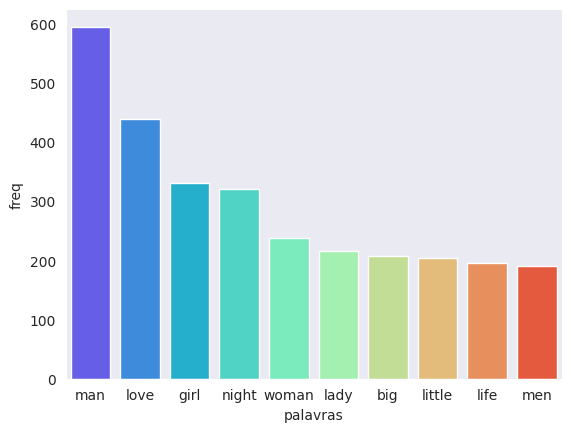

In [ ]:
sns.barplot(data = termos[:10],
                    x = 'palavras',
                    y = 'freq',
                    palette = 'rainbow')

In [ ]:
#grafico.figure.set_size_inches(12,8)

In [ ]:
plt.savefig("barras.png", format='png')

<Figure size 640x480 with 0 Axes>

In [ ]:
### nuvens de palavras
from wordcloud import WordCloud

In [ ]:
### para fazer nuvem de palavras
# pegar o titulo 2  e colcoar numa string
# enorme

In [ ]:
palavra2 = " ".join(s for s in titulo2)

In [ ]:
type(palavra2)

str

In [ ]:
palavra2

"dark central park boarding school girls' pajama parade buffalo bill's wild west parad caught clowns spinning hats capture boer battery british enchanted drawing feeding sea lions make fat wife two lean ones new life rescue new morning bath searching ruins broadway galveston dead bodies tribulations amateur photographer trouble hogan's alley two old sparks wonder ching ling foo watermelon contest acrobats cairo affair honor another job undertaker arrival tongkin train artist's dilemma band battalion u indian school barnum bailey's circus beef extract room boxing barrels branding hams buffalo street parade busy corner armour's bund shanghai circular panorama base electric tower ending looking mall circular panorama electric tower pond circular panorama esplanade electric tower background coaling steamer nagasaki bay japan convention railroad passengers cornell columbia university pennsylvania boat race ithaca n showing lehigh valley observation train couchee dance midway donkey party fi

In [ ]:
# configuração da nuvem de palavras
nuvem = WordCloud(background_color= "black",
                  width= 1600,
                  height= 800).generate(palavra2)

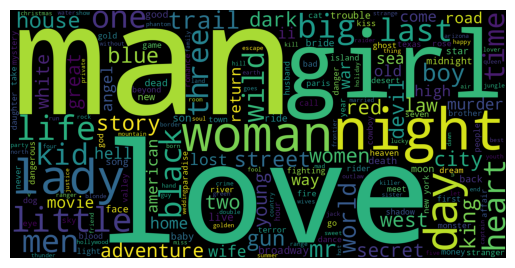

In [ ]:
plt.figure()
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.imshow(nuvem)
nuvem.to_file("nuvemPalavras.png")